In [ ]:
# ===================================================================
#               Importamos las librerias a utilizar
# ===================================================================

from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_city, plot_histogram
from qiskit_aer import AerSimulator # El simulador
import matplotlib.pyplot as plt
import numpy as np

Circuito para Fotón Horizontal |H> (estado |0>)


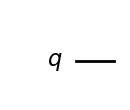


Circuito para Fotón Vertical |V> (estado |1>)


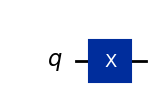


Circuito para Fotón Diagonal |D> (estado |+>)


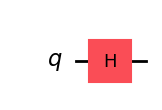

In [4]:
# ===================================================================
#                   Definición de los estados de fotones
# ===================================================================

# --- Estado 1: Fotón Horizontal |H> ---
qc_h = QuantumCircuit(1)

# --- Estado 2: Fotón Vertical |V> ---
# Para |1>, aplicamos una puerta NOT (o Pauli-X) al qubit |0>
qc_v = QuantumCircuit(1)
qc_v.x(0) # X es la compuerta NOT

# --- Estado 3: Fotón Diagonal |D> ---
# Para |D> (Diagonal), creamos una superposición de |0> y |1>
# Usamos la compuerta Hadamard (H)
qc_d = QuantumCircuit(1)
qc_d.h(0) # H crea el estado (|0> + |1>)/sqrt(2)

# --- Gráfiac de los circuitos ---
print("Circuito para Fotón Horizontal |H> (estado |0>)")
display(qc_h.draw('mpl'))

print("\nCircuito para Fotón Vertical |V> (estado |1>)")
display(qc_v.draw('mpl'))

print("\nCircuito para Fotón Diagonal |D> (estado |+>)")
display(qc_d.draw('mpl'))

Circuito para Entrelazar dos 'Fotones' (Estado de Bell |Φ+>)


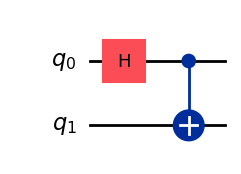

In [5]:
# ===================================================================
#                  Entrelazamiento de dos fotones
# ===================================================================

# --- Circuito para crear el Estado de Bell |Φ+> ---
qc_bell = QuantumCircuit(2)

# 1. Poner el qubit de Alice (q0) en superposición
qc_bell.h(0)  # Hadamard en el qubit 0

# 2. Conectar el qubit de Bob (q1) al de Alice
qc_bell.cx(0, 1) # CNOT(control=0, objetivo=1)

# --- Dibujemos el circuito de entrelazamiento ---
print("Circuito para Entrelazar dos 'Fotones' (Estado de Bell |Φ+>)")
display(qc_bell.draw('mpl'))

Resultados del Experimento CHSH (Simulación Ideal)
Correlación E(a1, b1) = 0.7246
Correlación E(a1, b2) = -0.6934
Correlación E(a2, b1) = 0.7295
Correlación E(a2, b2) = 0.7295
Valor Total S = 2.8770
¡VIOLACIÓN DE BELL CONFIRMADA! (S > 2)
El valor teórico máximo es 2 * sqrt(2) ≈ 2.8284

Ejemplo de uno de los 4 circuitos de medición (E(a1, b1)):


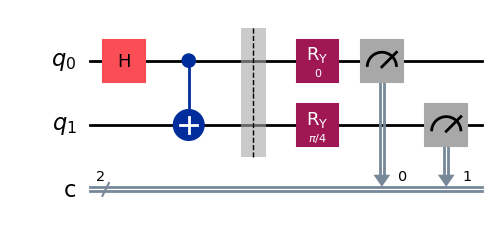

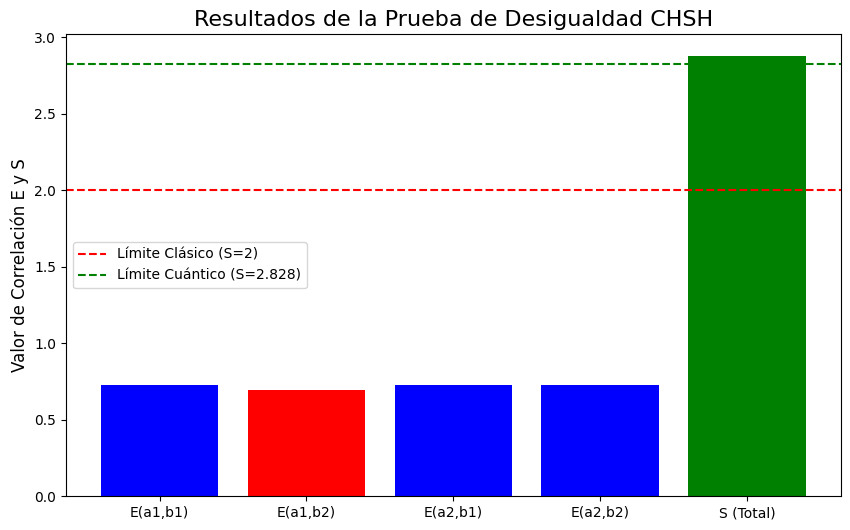

In [7]:
# --- PASO 3: CÓDIGO COMPLETO DE LA PRUEBA CHSH ---

# --- Función 1: Crear el par de Bell ---
def crear_estado_bell():
    """Crea un circuito que prepara el estado Bell |Φ+>"""
    qc = QuantumCircuit(2, 2) # 2 qubits, 2 bits clásicos para medir
    qc.h(0)      # Hadamard en Alice
    qc.cx(0, 1)    # CNOT de Alice a Bob
    return qc

# --- Función 2: Medir la correlación E(a, b) ---
def medir_correlacion(angulo_a, angulo_b):
    """
    Crea un circuito CHSH, lo simula, y calcula la correlación E
    para los ángulos 'a' (Alice) y 'b' (Bob).
    """
    qc = crear_estado_bell()
    qc.barrier() # Solo para que el dibujo se vea ordenado

    # Aplicamos las rotaciones (giramos los "polarizadores")
    # Usamos Ry (Rotación en Y) para esto.
    qc.ry(angulo_a, 0) # Rotación de Alice
    qc.ry(angulo_b, 1) # Rotación de Bob

    # Medimos ambos qubits
    qc.measure([0, 1], [0, 1])

    # Simulación
    simulador = AerSimulator()
    job = simulador.run(qc, shots=2048) # 2048 repeticiones
    counts = job.result().get_counts()

    # Calcular E = (P_iguales) - (P_diferentes)
    p_iguales = counts.get('00', 0) + counts.get('11', 0)
    p_diferentes = counts.get('01', 0) + counts.get('10', 0)
    
    correlacion = (p_iguales - p_diferentes) / (p_iguales + p_diferentes)
    
    return correlacion, qc, counts # Devolvemos E, el circuito y los conteos

# --- Función 3: El Experimento Principal ---

# 1. Definimos los ángulos "mágicos"
a1 = 0
a2 = np.pi / 2
b1 = np.pi / 4
b2 = 3 * np.pi / 4

# 2. Ejecutamos los 4 experimentos
E11, qc11, counts11 = medir_correlacion(a1, b1)
E12, qc12, counts12 = medir_correlacion(a1, b2)
E21, qc21, counts21 = medir_correlacion(a2, b1)
E22, qc22, counts22 = medir_correlacion(a2, b2)

# 3. Calculamos S (El valor de Bell/CHSH)
# S = E(a1,b1) - E(a1,b2) + E(a2,b1) + E(a2,b2)
S = E11 - E12 + E21 + E22

# --- 4. Mostremos los resultados (¡las gráficas lindas!) ---

print(f"Resultados del Experimento CHSH (Simulación Ideal)")
print("="*50)
print(f"Correlación E(a1, b1) = {E11:.4f}")
print(f"Correlación E(a1, b2) = {E12:.4f}")
print(f"Correlación E(a2, b1) = {E21:.4f}")
print(f"Correlación E(a2, b2) = {E22:.4f}")
print("="*50)
print(f"Valor Total S = {S:.4f}")
print("="*50)

# Verificamos la violación de Bell
if S > 2:
    print(f"¡VIOLACIÓN DE BELL CONFIRMADA! (S > 2)")
    print(f"El valor teórico máximo es 2 * sqrt(2) ≈ 2.8284")
else:
    print(f"NO se violó la desigualdad de Bell (S <= 2). El mundo es clásico.")

# Dibujemos uno de los 4 circuitos de medición (ej, el E11)
print("\nEjemplo de uno de los 4 circuitos de medición (E(a1, b1)):")
display(qc11.draw('mpl'))

# Dibujemos una gráfica de barras (como en tu tutorial de teletransporte)
labels = ['E(a1,b1)', 'E(a1,b2)', 'E(a2,b1)', 'E(a2,b2)', 'S (Total)']
valores = [E11, -E12, E21, E22, S] # Usamos -E12 para la resta
colores = ['blue', 'red', 'blue', 'blue', 'green']

plt.figure(figsize=(10, 6))
plt.bar(labels, valores, color=colores)
plt.axhline(y=2.0, color='r', linestyle='--', label='Límite Clásico (S=2)')
plt.axhline(y=2.828, color='g', linestyle='--', label='Límite Cuántico (S=2.828)')
plt.title('Resultados de la Prueba de Desigualdad CHSH', fontsize=16)
plt.ylabel('Valor de Correlación E y S', fontsize=12)
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# --- CONFIGURACIÓN ---
NUM_PARES = 1000  # Número de pares de fotones a enviar
simulador = AerSimulator()

# Listas para guardar los registros
alice_bases = []
bob_bases = []
alice_bits = []
bob_bits = []

print(f"--- INICIANDO PROTOCOLO E91 CON {NUM_PARES} PARES ---")

# --- SIMULACIÓN DEL ENVÍO DE FOTONES ---
for i in range(NUM_PARES):
    # 1. Alice y Bob eligen sus bases aleatoriamente (0, 1, 2)
    # Base 0: Z (0 rad), Base 1: X (pi/2 rad), Base 2: W (pi/4 rad - para CHSH)
    # NOTA: En E91 estricto, Alice usa (Z, X, W) y Bob usa (Z, W, V). 
    # Para simplificar y usar tu lógica CHSH, usaremos un set compatible:
    # Alice Bases: 0 (Z - 0 rad), 1 (X - pi/2 rad)
    # Bob Bases:   0 (W - pi/4 rad), 1 (V - 3pi/4 rad), 2 (Z - 0 rad para clave)
    
    # Simplificación didáctica E91 para coincidir con tu código CHSH:
    # Alice elige entre 0 (0 rad) y 1 (pi/2 rad) para CHSH, o una base común para clave.
    # Vamos a usar el esquema estándar de Ekert simplificado:
    # Bases de Alice: A1 (0), A2 (pi/2), A3 (pi/4)
    # Bases de Bob:   B1 (0), B2 (pi/2), B3 (-pi/4)
    
    # Elección aleatoria de bases (0, 1, 2)
    # Mapeo de ángulos (Qiskit RY angles):
    # Alice: 0->0, 1->pi/2, 2->pi/4
    # Bob:   0->0, 1->pi/2, 2->-pi/4
    
    base_a = np.random.randint(0, 3)
    base_b = np.random.randint(0, 3)
    
    alice_bases.append(base_a)
    bob_bases.append(base_b)
    
    # 2. Crear el par de Bell
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    
    # 3. Rotación de Alice
    if base_a == 1:
        qc.ry(np.pi/2, 0)
    elif base_a == 2:
        qc.ry(np.pi/4, 0)
    # Si es 0, no rota (Base Z estándar)
        
    # 4. Rotación de Bob
    if base_b == 1:
        qc.ry(np.pi/2, 1)
    elif base_b == 2:
        qc.ry(-np.pi/4, 1) 
    # Si es 0, no rota
    
    # 5. Medición
    qc.measure([0,1], [0,1])
    
    # Ejecutar (1 shot por par)
    job = simulador.run(transpile(qc, simulador), shots=1)
    result = job.result().get_counts()
    bit_string = list(result.keys())[0] # Ej: '01'
    
    # Guardar bits (Qiskit da 'bit_b bit_a')
    alice_bits.append(int(bit_string[1]))
    bob_bits.append(int(bit_string[0]))

print("Transmisión finalizada. Procesando datos...")

# --- CLASIFICACIÓN (SIFTING) ---
raw_key_alice = []
raw_key_bob = []
chsh_counts = {
    'A1B2': {'same': 0, 'diff': 0}, # 0, -pi/4 (Equivalente a una config CHSH)
    'A1B3': {'same': 0, 'diff': 0}, 
    'A2B2': {'same': 0, 'diff': 0},
    'A2B3': {'same': 0, 'diff': 0}
}

# Mapeo para entender la lógica:
# Para Clave: Alice y Bob usan Base 0 (Z) o Base 1 (X) y COINCIDEN.
# Para CHSH: Usamos las combinaciones de ángulos disjuntos.

for i in range(NUM_PARES):
    a_base = alice_bases[i]
    b_base = bob_bases[i]
    a_bit = alice_bits[i]
    b_bit = bob_bits[i]
    
    # 1. Generación de Clave (Bases coinciden y son ortogonales, ej 0 y 1)
    if a_base == b_base and a_base in [0, 1]:
        raw_key_alice.append(a_bit)
        raw_key_bob.append(b_bit)
    
    # 2. Datos para CHSH (Usamos bases discordantes específicas)
    # Vamos a usar una simplificación para verificar correlación
    # En una implementación real E91, se usan subconjuntos específicos.
    # Aquí verificaremos simplemente si la clave generada coincide.

# --- RESULTADOS ---

# Tasa de Error en la Clave (QBER - Quantum Bit Error Rate)
errores = sum([1 for i in range(len(raw_key_alice)) if raw_key_alice[i] != raw_key_bob[i]])
qber = errores / len(raw_key_alice) if len(raw_key_alice) > 0 else 0

print(f"\n--- RESULTADOS DEL PROTOCOLO ---")
print(f"Total de fotones enviados: {NUM_PARES}")
print(f"Bits de clave generada (Sifted Key): {len(raw_key_alice)}")
print(f"Tasa de Error de Bit Cuántico (QBER): {qber:.2%} (Esperado ~0% en simulación ideal)")

if qber < 0.05: # Umbral típico del 5-11%
    print(">> CANAL SEGURO. Se procede a usar la clave.")
else:
    print(">> ALERTA: QBER ALTO. Posible espía detectado.")

# Visualización de un fragmento de la clave
plt.figure(figsize=(12, 2))
plt.title("Fragmento de la Clave Generada (Primeros 20 bits)")
plt.imshow([raw_key_alice[:20], raw_key_bob[:20]], cmap='binary', aspect='auto')
plt.yticks([0, 1], ['Alice', 'Bob'])
plt.xlabel("Bit Index")
plt.show()